In [1]:
import pandas as pd
import numpy as np

In [2]:
datos = pd.read_csv('../data/measurements.csv')

In [3]:
datos.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [4]:
def clean_datos(datos):
    # Convert ','-formatted numbers to '.' and convert to numeric
    datos['consume'] = pd.to_numeric(datos['consume'].str.replace(',', '.'), errors='coerce')
    datos['temp_inside'] = pd.to_numeric(datos['temp_inside'].str.replace(',', '.'), errors='coerce')

    # Convert temperature-related columns to numeric
    datos['temp_outside'] = pd.to_numeric(datos['temp_outside'], errors='coerce')

    # Convert refill-related columns to numeric
    datos['refill liters'] = pd.to_numeric(datos['refill liters'], errors='coerce')
    datos['refill gas'] = pd.to_numeric(datos['refill gas'], errors='coerce')

    # Handle missing values
    datos.fillna(0, inplace=True)  # Replace NaN with 0

    return datos

cleaned_datos = clean_datos(datos.copy())


In [5]:
cleaned_datos.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5.0,26,21.5,12,0,E10,0,0,0,45.0,0.0
1,12,4.2,30,21.5,13,0,E10,0,0,0,0.0,0.0
2,"11,2",5.5,38,21.5,15,0,E10,0,0,0,0.0,0.0
3,"12,9",3.9,36,21.5,14,0,E10,0,0,0,0.0,0.0
4,"18,5",4.5,46,21.5,15,0,E10,0,0,0,0.0,0.0


In [8]:
def remove_columns_with_high_nulls_or_zeros(df, threshold=0.9):
    # Calcula el porcentaje de valores nulos o 0 en cada columna
    nulls_zeros_percentage = (df.isnull() | (df == 0)).mean()

    # Selecciona las columnas que cumplen con el umbral
    columns_to_drop = nulls_zeros_percentage[nulls_zeros_percentage > threshold].index

    # Elimina las columnas seleccionadas
    df_cleaned = df.drop(columns=columns_to_drop)

    return df_cleaned

# Assuming your DataFrame is named 'datos'
cleaned_datos = remove_columns_with_high_nulls_or_zeros(cleaned_datos)


In [9]:
cleaned_datos

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,rain
0,28,5,26,"21,5",12,NaN,E10,0
1,12,"4,2",30,"21,5",13,NaN,E10,0
2,"11,2","5,5",38,"21,5",15,NaN,E10,0
3,"12,9","3,9",36,"21,5",14,NaN,E10,0
4,"18,5","4,5",46,"21,5",15,NaN,E10,0
...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0
384,"16,1","4,3",38,25,31,AC,SP98,0
385,16,"3,8",45,25,19,NaN,SP98,0
386,"15,4","4,6",42,25,31,AC,SP98,0


In [10]:
def count_nulls_per_column(df):
    null_counts = df.isnull().sum()
    return null_counts

null_counts = count_nulls_per_column(cleaned_datos)

print(null_counts)


distance          0
consume           0
speed             0
temp_inside      12
temp_outside      0
specials        295
gas_type          0
rain              0
dtype: int64


In [11]:
datos_cleaned = cleaned_datos.drop('specials', axis=1)

In [25]:
datos_cleaned.temp_inside.unique()

array(['21,5', '22,5', '20', nan, '21', '20,5', '23', '23,5', '25', '24',
       '22', '19', '24,5', '25,5'], dtype=object)

In [27]:
def clean_car_data(df):
    # Replace ',' with '.' in the entire DataFrame
    df.replace(',', '.', regex=True, inplace=True)

    # Convert numeric columns to numeric
    numeric_columns = ['consume', 'temp_inside', 'temp_outside']
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

    # Handle missing values
    df.fillna(0, inplace=True)  # Replace NaN with 0

    return df

# Assuming your DataFrame is named 'datos'
cleaned_datos = clean_car_data(datos_cleaned)


In [28]:
cleaned_datos

,distance,consume,speed,temp_inside,temp_outside,gas_type,rain
0,28,5.0,26,21.5,12,E10,0
1,12,4.2,30,21.5,13,E10,0
2,11.2,5.5,38,21.5,15,E10,0
3,12.9,3.9,36,21.5,14,E10,0
4,18.5,4.5,46,21.5,15,E10,0
...,...,...,...,...,...,...,...
383,16,3.7,39,24.5,18,SP98,0
384,16.1,4.3,38,25.0,31,SP98,0
385,16,3.8,45,25.0,19,SP98,0
386,15.4,4.6,42,25.0,31,SP98,0


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
import pandas as pd

def clean_car_data(df):
    # Replace ','-formatted numbers with '.' and convert to numeric
    columns_to_clean = ['consume', 'temp_inside']
    
    for col in columns_to_clean:
        df[col] = pd.to_numeric(df[col].str.replace(',', '.'), errors='coerce')

    # Convert temperature-related columns to numeric
    df['temp_outside'] = pd.to_numeric(df['temp_outside'], errors='coerce')

    # Convert refill-related columns to numeric
    df['refill liters'] = pd.to_numeric(df['refill liters'], errors='coerce')
    df['refill gas'] = pd.to_numeric(df['refill gas'], errors='coerce')

    # Handle missing values
    df.fillna(0, inplace=True)  # Replace NaN with 0

    return df

# Assuming your DataFrame is named 'datos'
cleaned_datos = clean_car_data(datos_cleaned)


AttributeError: Can only use .str accessor with string values!

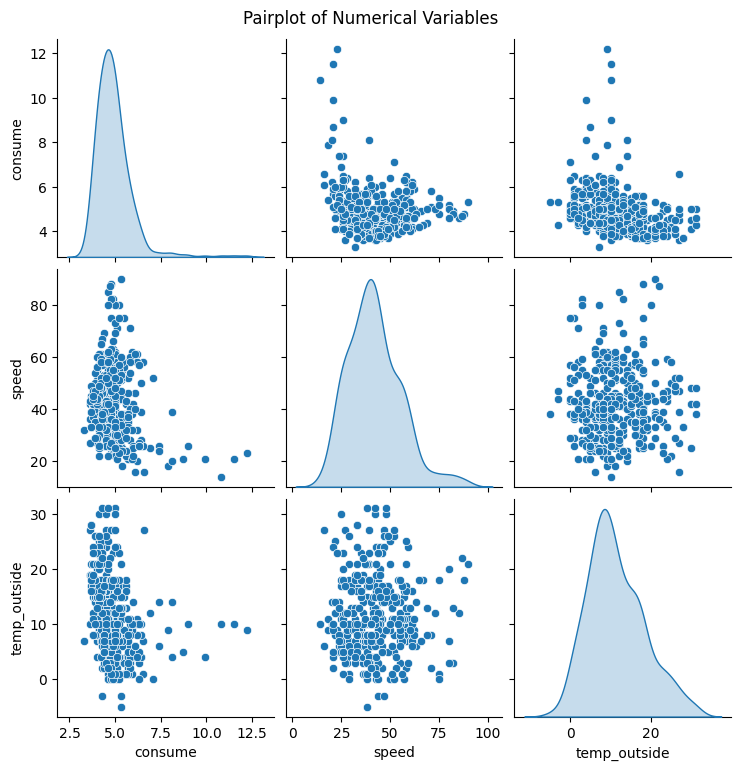

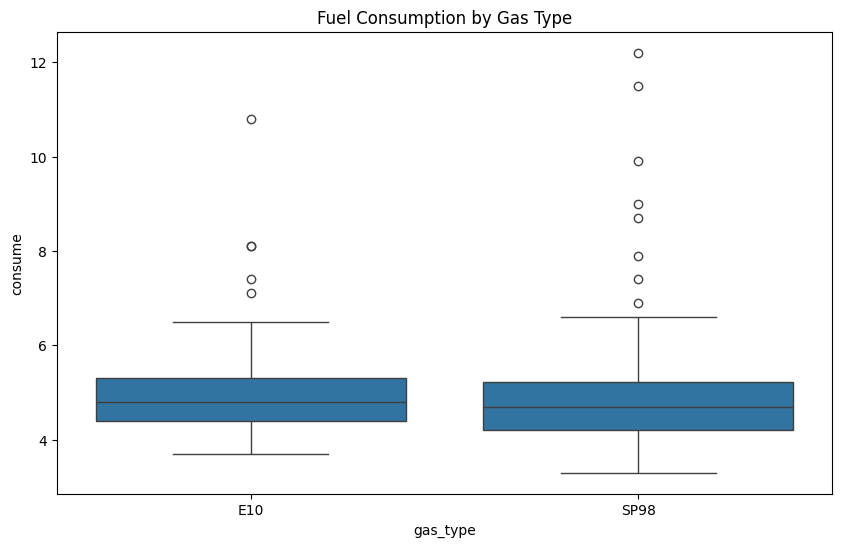

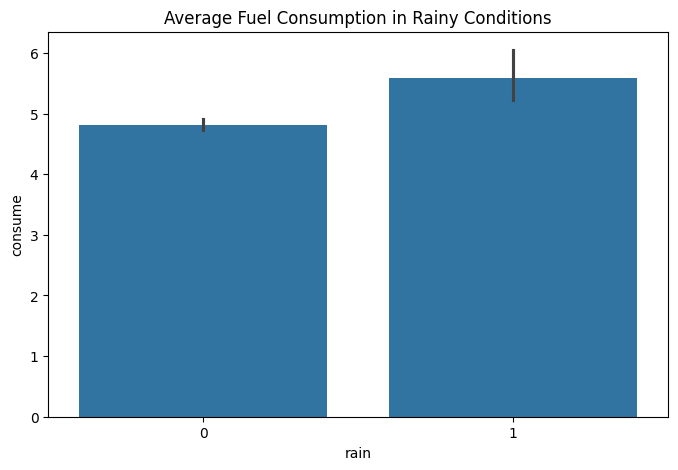

In [14]:
datos_cleaned['consume'] = datos_cleaned['consume'].str.replace(',', '.').astype(float)

# Pairplot to visualize relationships between numerical variables
sns.pairplot(datos_cleaned[['distance', 'consume', 'speed', 'temp_inside', 'temp_outside']], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

# Boxplot to visualize fuel consumption based on gas type
plt.figure(figsize=(10, 6))
sns.boxplot(x='gas_type', y='consume', data=datos_cleaned)
plt.title('Fuel Consumption by Gas Type')
plt.show()

# Barplot to visualize the average consumption in rainy conditions
plt.figure(figsize=(8, 5))
sns.barplot(x='rain', y='consume', data=datos_cleaned)
plt.title('Average Fuel Consumption in Rainy Conditions')
plt.show()

Hypotheses:
Fuel Consumption and Speed:
There could be a negative correlation between speed and fuel consumption. Higher speeds may lead to increased fuel consumption.
Analysis: Check the correlation between the 'speed' and 'consume' variables.

Effect of Rain on Fuel Consumption:
Rainy conditions may affect fuel consumption due to changes in driving conditions.
Analysis: Compare average fuel consumption in rainy and non-rainy conditions.

Difference in Consumption Between Gas Types:
Different gas types (E10, etc.) may have varying impacts on fuel consumption.
Analysis: Compare fuel consumption distributions between different gas types.

Predictions:

Regression - Predicting Fuel Consumption:
Task: Build a regression model to predict fuel consumption based on other features such as distance, speed, temperature, etc.
Model: Linear Regression, Random Forest Regression, or similar.

Classification - Gas Type Prediction:
Task: Build a classification model to predict the type of gas used based on other features.
Model: Logistic Regression, Decision Tree Classifier, or similar.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

# Regression: Predicting Fuel Consumption
X_reg = cleaned_datos[['distance', 'speed', 'temp_inside', 'temp_outside', 'rain']]
y_reg = cleaned_datos['consume']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

reg_model = RandomForestRegressor()
reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_reg)

regression_rmse = mean_squared_error(y_test_reg, y_pred_reg, squared=False)
print(f"Regression RMSE: {regression_rmse}")

# Classification: Gas Type Prediction
X_cls = cleaned_datos[['distance', 'speed', 'temp_inside', 'temp_outside', 'rain']]
y_cls = cleaned_datos['gas_type']

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

cls_model = RandomForestClassifier()
cls_model.fit(X_train_cls, y_train_cls)
y_pred_cls = cls_model.predict(X_test_cls)

classification_accuracy = accuracy_score(y_test_cls, y_pred_cls)
print(f"Classification Accuracy: {classification_accuracy}")


Regression RMSE: 0.6546109501021128
Classification Accuracy: 0.6923076923076923
